# preparing Data

In [1]:
import pandas as pd
import numpy as np
import tqdm
df = pd.read_csv('text_emotion.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [2]:
df=df.drop(['tweet_id','author'],axis=1)

df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [3]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [4]:
imp_emotions = ['sadness' , 'happiness' , 'anger' , 'neutral']

un_imp_emotions=[item for item in (df['sentiment'].unique()) if item not in imp_emotions ]
un_imp_emotions

['empty',
 'enthusiasm',
 'worry',
 'surprise',
 'love',
 'fun',
 'hate',
 'boredom',
 'relief']

In [5]:
for i in un_imp_emotions:
    df = df.drop(df[df.sentiment == i].index)

df

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
4,neutral,@dannycastillo We want to trade with someone w...
6,sadness,"I should be sleep, but im not! thinking about ..."
8,sadness,@charviray Charlene my love. I miss you
...,...,...
39992,neutral,@jasimmo Ooo showing of your French skills!! l...
39993,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
39994,happiness,Succesfully following Tayla!!
39995,neutral,@JohnLloydTaylor


C:\Users\Muhammad Swelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

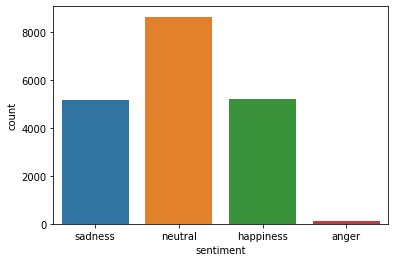

In [6]:
import seaborn as sns
sns.countplot(df['sentiment'])

In [7]:
data= pd.read_csv('new_data.csv')
data

,content,sentiment
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am feeling grouchy,anger
3,ive been feeling a little burdened lately wasn...,sadness
4,i feel like i have to make the suffering i m s...,sadness
...,...,...
8978,i have a feeling im going to be heartless,anger
8979,i often find my self feeling offended myself w...,anger
8980,i took a minute to appreciate the trees around...,anger
8981,i moved away he said something that made me fe...,anger


In [8]:
collection=[df,data]
df=pd.concat(collection)
df

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
4,neutral,@dannycastillo We want to trade with someone w...
6,sadness,"I should be sleep, but im not! thinking about ..."
8,sadness,@charviray Charlene my love. I miss you
...,...,...
8978,anger,i have a feeling im going to be heartless
8979,anger,i often find my self feeling offended myself w...
8980,anger,i took a minute to appreciate the trees around...
8981,anger,i moved away he said something that made me fe...


C:\Users\Muhammad Swelam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

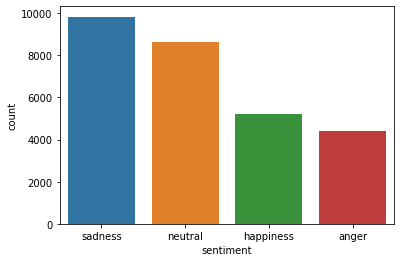

In [9]:
import seaborn as sns
sns.countplot(df['sentiment'])

# pre-processing

In [10]:
#Normalization

df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))



In [11]:
# Punctuation, Symbols

df['content'] = df['content'].str.replace('[^\w\s]',' ')

C:\Users\MUHAMM~1\AppData\Local\Temp/ipykernel_14820/1223891886.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['content'] = df['content'].str.replace('[^\w\s]',' ')


In [12]:
#Stop Words

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
#Lemmatization

from textblob import Word
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [14]:
#Correcting more than 2 Repetitions

import re

def de_repeat(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

df['content'] = df['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split()))


In [15]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()[-1300:]
freq

dancefloor            1
dj_diva               1
bennsu                1
gallethoo             1
lexiphanic            1
                     ..
avaamnesia            1
flucio                1
flaxandfiberfriday    1
dougbenson            1
subbing               1
Length: 1300, dtype: int64

In [16]:
freq = list(freq.index)
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [17]:
df.head()

,sentiment,content
1,sadness,layin n bed headache ughh waitin call
2,sadness,funeral ceremony gloomy friday
4,neutral,dannycastillo want trade someone houston ticke...
6,sadness,sleep im thinking old friend want married damn...
8,sadness,charviray charlene love miss


# Feature extraction


In [78]:
#Encoding output labels

from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df['sentiment'].values)
y

array([3, 3, 2, ..., 0, 0, 0])

In [79]:
#train & test split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df['content'].values, y, random_state=42, test_size=0.2, shuffle=True)
X_train

array(['forsakendaemon hooray',
       'sarahjanderson skinny dipping work colleague maybe never live lot',
       'feelin lonely spendin last 50 hour friend', ...,
       'ooh feel sleepy 10 24 dont wanna go school 2day',
       'musicsinmysoul_ http twitpic com 4wi78 hmm thats bu tour list thats cool say 2008',
       'help feel personally insulted oscar denounced idea grotesque unrealistic'],
      dtype=object)

In [20]:
#TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, analyzer='word',ngram_range=(1,3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.fit_transform(X_val)

X_train_tfidf

<22484x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 118772 stored elements in Compressed Sparse Row format>

In [21]:
#Count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(df['content'])
X_train_count =  count_vect.transform(X_train)
X_val_count =  count_vect.transform(X_val)

X_train_count

<22484x28841 sparse matrix of type '<class 'numpy.int64'>'
	with 171962 stored elements in Compressed Sparse Row format>

# Modeling

In [22]:
# Models with TF-IDF 
from sklearn.metrics import accuracy_score


# Model 1: Linear SVM
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=20)
lsvm.fit(X_train_tfidf, y_train)
y_pred = lsvm.predict(X_val_tfidf)
print('svm using tfidf accuracy %s' % accuracy_score(y_pred, y_val))



# Model 2: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_val_tfidf)
print('random forest using tfidf accuracy %s' % accuracy_score(y_pred, y_val))


svm using tfidf accuracy 0.36363636363636365
random forest using tfidf accuracy 0.3280555061376979


In [23]:
#Models with count vectorization

# Model 2: Linear SVM
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_count, y_train)
y_pred = lsvm.predict(X_val_count)
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))


# Model 4: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_count, y_train)
y_pred = rf.predict(X_val_count)
print('random forest with count vectors accuracy %s' % accuracy_score(y_pred, y_val))


lsvm using count vectors accuracy 0.7155310442981676
random forest with count vectors accuracy 0.7123287671232876


# pipeline the best model

In [107]:
from sklearn.pipeline import Pipeline

model= Pipeline([('vctorizer',CountVectorizer(analyzer='word')) , ('classifier',SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None))])

model.fit(X_train, y_train)
y_pred=model.predict(X_val)
print(y_pred)
print(lbl_enc.inverse_transform(y_pred))
print('lsvm using count vectors accuracy %s' % accuracy_score(y_pred, y_val))


[3 3 3 ... 3 0 3]
['sadness' 'sadness' 'sadness' ... 'sadness' 'anger' 'sadness']
lsvm using count vectors accuracy 0.7155310442981676


In [92]:
X_val[2]

'im sure couple month feeling homesick skype family thanksgiving im working first time december th taiwan already surprised interesting enjoyable holiday'

In [110]:
xx=model.predict(["iam so angry"])
xx
xxx=lbl_enc.inverse_transform(xx)
xxx

array(['neutral'], dtype=object)

In [93]:
import pickle
pkl_filename = 'final_model.pkl'
with open(pkl_filename, 'wb') as f:
    pickle.dump(model, f)

# Deep Learning

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, Bidirectional, Conv1D, GRU,SpatialDropout1D
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D,MaxPooling1D
from keras.layers.embeddings import Embedding

num_words = 10000 # this means 10000 unique words can be taken 

tokenizer=Tokenizer(num_words,lower=True)

vocab_size = len(tokenizer.word_index) + 1

data=tokenizer.fit_on_texts(df['content'])
data=tokenizer.texts_to_sequences(df['content']) 
print(vocab_size)

1


In [27]:
X_train, X_val, y_train, y_val = train_test_split(data, y, random_state=42, test_size=0.2, shuffle=True)


In [28]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_val = pad_sequences(X_val, padding='post', maxlen=100)


In [29]:
embeddings_index = {} 

f = open('glove.6B.100d.txt', encoding="utf8") 

for line in f: 
    values = line.split() 
    word = values[0] 
    coefs = np.asarray(values[1:], dtype='float32') 
    embeddings_index[word] = coefs 
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
embedding_matrix = np.zeros((len( tokenizer.word_index)+1, 100)) 

for word, i in tokenizer.word_index.items(): 
    
    embedding_vector = embeddings_index.get(word) 
    
    if embedding_vector is not None: 
        
        embedding_matrix[i] = embedding_vector

embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.042895  ,  0.70670998,  0.75316   , ..., -0.54229999,
         0.11809   ,  0.39974001],
       [ 0.29164001,  0.39796001,  1.04530001, ..., -0.46880999,
        -0.04079   ,  0.45881999],
       ...,
       [ 0.37327999, -0.34395   ,  0.30717   , ...,  0.43054   ,
        -0.25185999, -0.015864  ],
       [-0.073637  , -0.15961   ,  0.14008   , ...,  0.40781   ,
        -0.96354002,  0.17701   ],
       [-0.54747999,  0.47907001,  0.29262999, ...,  0.17169   ,
         0.71335   , -0.23613   ]])

In [31]:
model = Sequential() 
model.add(Embedding(len(tokenizer.word_index) + 1, 
 100, 
 weights=[embedding_matrix], 
 input_length=100, 
 trainable=False)) 
model.add(SpatialDropout1D(0.3)) 
model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.8))
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.8))
model.add(Dense(4)) 
model.add(Activation('softmax')) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          2877400   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1024)              205824    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1

In [32]:
#EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [33]:
history_embedding = model.fit(X_train, y_train, 
                                epochs = 30, batch_size = 120, 
                                validation_data=(X_val, y_val),
                                verbose = 1, callbacks= [es, mc]  )

Epoch 1/30
188/188 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.4758
Epoch 00001: val_accuracy improved from -inf to 0.54385, saving model to .\model.h5
188/188 [==============================] - 177s 883ms/step - loss: 1.0992 - accuracy: 0.4758 - val_loss: 0.9351 - val_accuracy: 0.5439
Epoch 2/30
188/188 [==============================] - ETA: 0s - loss: 0.9729 - accuracy: 0.5445
Epoch 00002: val_accuracy improved from 0.54385 to 0.64134, saving model to .\model.h5
188/188 [==============================] - 168s 896ms/step - loss: 0.9729 - accuracy: 0.5445 - val_loss: 0.8502 - val_accuracy: 0.6413
Epoch 3/30
188/188 [==============================] - ETA: 0s - loss: 0.9156 - accuracy: 0.5819
Epoch 00003: val_accuracy improved from 0.64134 to 0.65611, saving model to .\model.h5
188/188 [==============================] - 177s 941ms/step - loss: 0.9156 - accuracy: 0.5819 - val_loss: 0.7949 - val_accuracy: 0.6561
Epoch 4/30
188/188 [=============================

188/188 [==============================] - 183s 973ms/step - loss: 0.6838 - accuracy: 0.7071 - val_loss: 0.6344 - val_accuracy: 0.7319
Epoch 28/30
188/188 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.7128
Epoch 00028: val_accuracy did not improve from 0.73190
188/188 [==============================] - 182s 967ms/step - loss: 0.6833 - accuracy: 0.7128 - val_loss: 0.6406 - val_accuracy: 0.7273
Epoch 29/30
188/188 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.7142
Epoch 00029: val_accuracy did not improve from 0.73190
188/188 [==============================] - 178s 946ms/step - loss: 0.6765 - accuracy: 0.7142 - val_loss: 0.6234 - val_accuracy: 0.7305
Epoch 30/30
188/188 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.7114
Epoch 00030: val_accuracy did not improve from 0.73190
188/188 [==============================] - 180s 957ms/step - loss: 0.6808 - accuracy: 0.7114 - val_loss: 0.6230 - val_accuracy: 0.7296


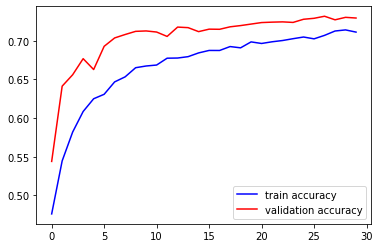

In [34]:
import matplotlib.pyplot as plt
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [35]:
y_pred=model.predict(X_val)
y_pred=np.argmax(y_pred,axis=1)

y_pred=lbl_enc.inverse_transform(y_pred)
y_test=lbl_enc.inverse_transform(y_val)


from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7295854830101406

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.96      0.94      0.95       856
   happiness       0.62      0.54      0.58      1051
     neutral       0.60      0.73      0.66      1686
     sadness       0.83      0.74      0.78      2028

    accuracy                           0.73      5621
   macro avg       0.75      0.74      0.74      5621
weighted avg       0.74      0.73      0.73      5621

